#### Description

A dataset containing the prices and other attributes of almost 54,000 diamonds. The variables are as follows:

#### Details

* carat. weight of the diamond (0.2--5.01)
* cut. quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* colour. diamond colour, from J (worst) to D (best)
* clarity. a measurement of how clear the diamond is (I1 (worst), SI1, SI2, VS1, VS2, VVS1, VVS2, IF (best))
* depth. total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* table. width of top of diamond relative to widest point (43--95)
* price. price in US dollars (\$326--\$18,823)
* x. length in mm (0--10.74)
* y. width in mm (0--58.9)
* z. depth in mm (0--31.8)

Read here for more information :

https://www.brilliance.com/education/diamonds/cut

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
warnings.filterwarnings('ignore') 

In [2]:
#load the file and set the first column as the index
train = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\Assignment 1\diamonds.csv",index_col = 0)

In [3]:
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
train.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
print ("\n\n---------------------")
print ("TRAIN SET INFORMATION")
print ("---------------------")
print ("Shape of training set:", train.shape, "\n")
print ("Column Headers:", list(train.columns.values), "\n")
print (train.dtypes)



---------------------
TRAIN SET INFORMATION
---------------------
Shape of training set: (53940, 10) 

Column Headers: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'] 

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


So there are 53940 number of observations and 10 different variables.

*** The different kind of variables are :
    *** 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'

In [6]:
import re
missing_values = []
nonumeric_values = []

print ("TRAINING SET INFORMATION")
print ("========================\n")

for column in train:
    # Find all the unique feature values
    uniq = train[column].unique()
    print ("'{}' has {} unique values" .format(column,uniq.size))
    if (uniq.size > 10):
        print("~~Listing up to 10 unique values~~")
    print (uniq[0:10])
    print ("\n-----------------------------------------------------------------------\n")
    
    # Find features with missing values
    if (True in pd.isnull(uniq)):
        s = "{} has {} missing" .format(column, pd.isnull(train[column]).sum())
        missing_values.append(s)
    
    # Find features with non-numeric values
    for i in range (1, np.prod(uniq.shape)):
        if (re.match('nan', str(uniq[i]))):
            break
        if not (re.search('(^\d+\.?\d*$)|(^\d*\.?\d+$)', str(uniq[i]))):
            nonumeric_values.append(column)
            break
  
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print ("Features with missing values:\n{}\n\n" .format(missing_values))
print ("Features with non-numeric values:\n{}" .format(nonumeric_values))
print ("\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")

TRAINING SET INFORMATION

'carat' has 273 unique values
~~Listing up to 10 unique values~~
[ 0.23  0.21  0.29  0.31  0.24  0.26  0.22  0.3   0.2   0.32]

-----------------------------------------------------------------------

'cut' has 5 unique values
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

-----------------------------------------------------------------------

'color' has 7 unique values
['E' 'I' 'J' 'H' 'F' 'G' 'D']

-----------------------------------------------------------------------

'clarity' has 8 unique values
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']

-----------------------------------------------------------------------

'depth' has 184 unique values
~~Listing up to 10 unique values~~
[ 61.5  59.8  56.9  62.4  63.3  62.8  62.3  61.9  65.1  59.4]

-----------------------------------------------------------------------

'table' has 127 unique values
~~Listing up to 10 unique values~~
[ 55.  61.  65.  58.  57.  56.  54.  62.  59.  63.]

----------------------

There is no missing value

It has 3 categorical variables:
* cut, color and clarity
    
cut is ordinal variable
    

In [7]:
#check for duplicates
# Check for duplicates
idsUnique = len(set(train.index))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")



There are 0 duplicate IDs for 53940 total entries


In [8]:
#get summary of numerical variables
train.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


##### We can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.

It looks that Price is skewed

##### For the non-numerical values, we can look at frequency distribution to understand whether they make sense or not. 

In [9]:
train['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [10]:
train['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [11]:
train['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [12]:
# Skewness of the distribution

print(train.skew())

# Values close to 0 show less skew
# The attributes are not skewed too much. Some algos may benefit if skew is corrected

carat    1.116646
depth   -0.082294
table    0.796896
price    1.618395
x        0.378676
y        2.434167
z        1.522423
dtype: float64


#### Class distribution

In [13]:
# Number of instances belonging to each class

train.groupby('cut').size()

#Need to study more--- We see that all classes have an equal presence. No class re-balancing is necessary

cut
Fair          1610
Good          4906
Ideal        21551
Premium      13791
Very Good    12082
dtype: int64

### Data Interaction

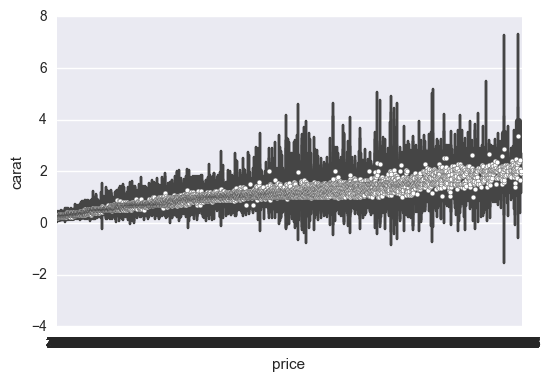

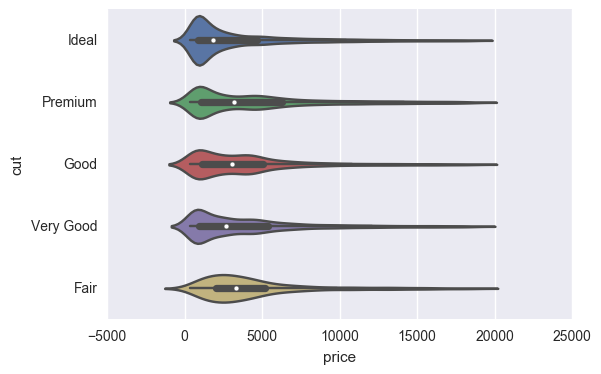

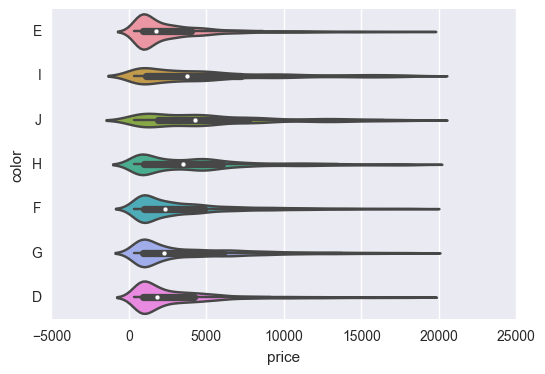

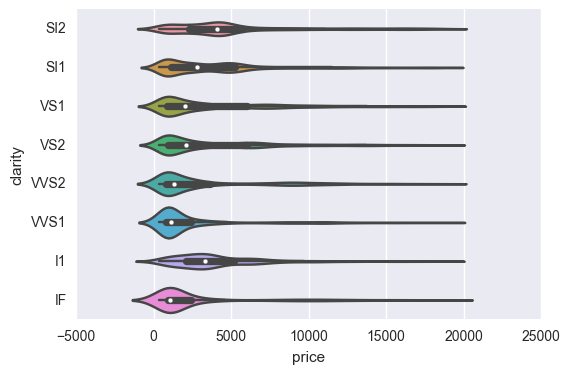

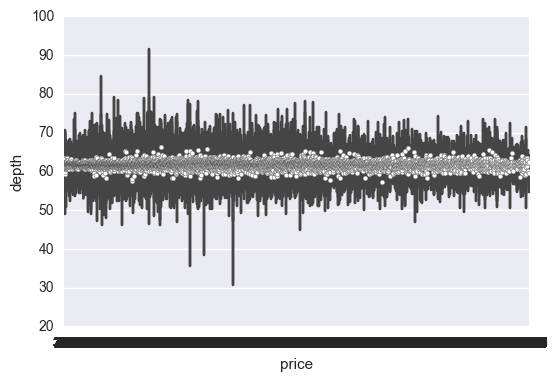

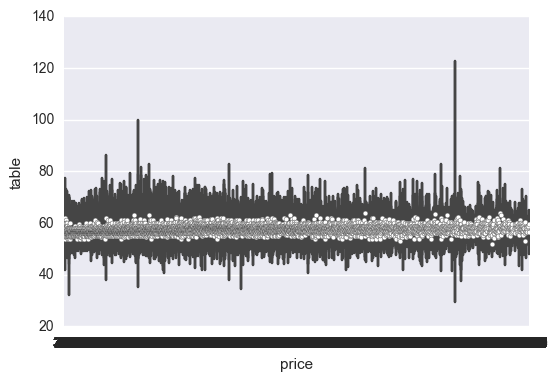

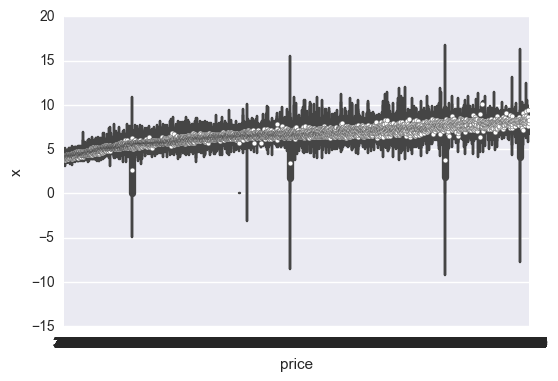

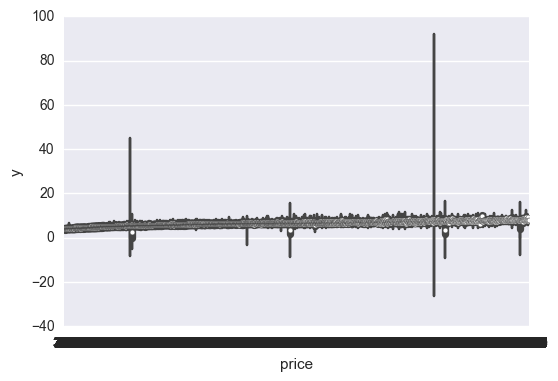

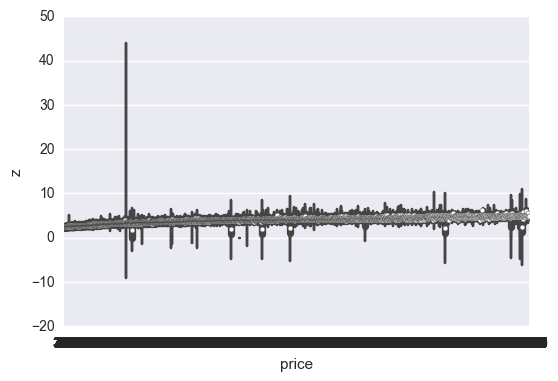

In [14]:
#re column the dataset with price at the end .. as a target
train_copy  = train[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z','price']]
# We will visualize all the attributes using Violin Plot - a combination of box and density plots

#names of all the attributes 
cols = train_copy.columns

#number of attributes (exclude target)
size = len(cols)-1

#x-axis has target attribute to distinguish between classes
x = cols[size]

#y-axis shows values of an attribute
y = cols[0:size]

#Plot violin for all attributes
for i in range(0,size):
    sns.violinplot(data=train_copy,x=x,y=y[i])  
    plt.show()

### Check when a value in a column is zero

In [15]:
#df[(df['A']>0) & (df['B']>0) & (df['C']>0)].count()

train[(train['x'] == 0)].count()

carat      8
cut        8
color      8
clarity    8
depth      8
table      8
price      8
x          8
y          8
z          8
dtype: int64

In [16]:
train[(train['y'] == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24521,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26244,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27430,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49558,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [17]:
#Separate Categorical Variables
cats = []
for col in train.columns.values:
    if train[col].dtype == 'object':
        cats.append(col)

In [18]:
#Create separte datasets for Continuous vs Categorical

train_cont = train.drop(cats, axis=1)
train_cat = train[cats]

In [19]:
train_cont.shape

(53940, 7)

In [20]:
train_cat.columns

Index(['cut', 'color', 'clarity'], dtype='object')

##### Plotting univariate distributions

TypeError: slice indices must be integers or None or have an __index__ method

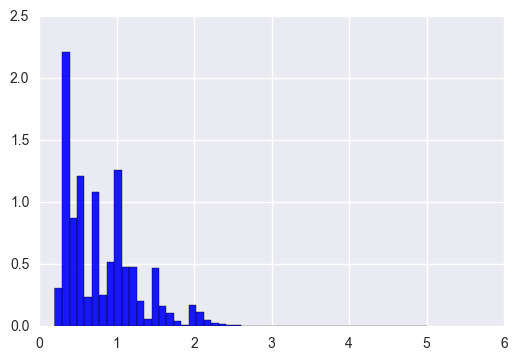

In [21]:
#draw a histogram and not fit a kernel density estimate (KDE).
sns.distplot(train['carat'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

In [ ]:
plt.rcParams['figure.figsize'] = (6.0, 3.0)
prices = pd.DataFrame({"price":train["price"], "log(price + 1)":np.log1p(train["price"])})
prices.hist(bins = 50)

In [ ]:
plt.rcParams['figure.figsize'] = (6.0, 3.0)
carat = pd.DataFrame({"carat":train["carat"], "log(carat + 1)":np.log1p(train["carat"])})
carat.hist(bins = 50)

In [ ]:
sns.set_style("whitegrid")
plt.plot(np.log1p(train["carat"]), np.log1p(train["price"]), linestyle='--',label='log(price + 1)')
#plt.plot(train['YrSold'], train['SalePrice'],  label='Year Sold')
plt.xlabel('log(carat + 1)')
plt.ylabel('log(price + 1)')
plt.title('log(carat + 1) Vs log(price + 1)')
plt.show()

In [ ]:
sns.distplot(train['carat'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

In [ ]:
sns.distplot(train['depth'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

In [ ]:
sns.distplot(train['table'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

In [ ]:
sns.distplot(train['price'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

In [ ]:
sns.distplot(train['x'], kde = True, color = 'b', hist_kws={'alpha': 0.9})

In [ ]:
sns.distplot(train['y'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

In [ ]:
sns.distplot(train['z'], kde = False, color = 'b', hist_kws={'alpha': 0.9})

In [ ]:
#we look at box plots to understand the distributions
train.boxplot(column='price')

In [ ]:
train.boxplot(column='price', by = 'clarity')

In [ ]:
#carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'carat', y = 'price',  data = train)
xt = plt.xticks(rotation=45)

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'cut', y = 'price',  data = train)
xt = plt.xticks(rotation=45)

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'clarity', y = 'price',  data = train)
xt = plt.xticks(rotation=45)

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(train_cont)

In [ ]:
#Pair Plot
plt.figure()
sns.pairplot(data=train[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']],
              dropna=True)

In [ ]:
sns.set_style("whitegrid")
plt.plot(train['carat'], train['price'],marker='o', linestyle='--', color='r',label='price')
#plt.plot(train['YrSold'], train['SalePrice'],  label='Year Sold')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Price Vs Carat')
plt.show()

In [ ]:
train['volume'] = train.x * train.y * train.z

In [ ]:
train.plot(kind="scatter",     # Create a scatterplot
              x="carat",          # Put carat on the x axis
              y="volume",          # Put price on the y axis
              figsize=(3,3),
              ylim=(0,2000))  

In [ ]:
train.plot(kind="scatter",     # Create a scatterplot
              x="volume",          # Put carat on the x axis
              y="price",          # Put price on the y axis
              figsize=(3,3),
              ylim=(0,4000))  

In [ ]:
correlationMatrix = train_copy.corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

###### It might be easier if you think of GROUP BY as "for each" for the sake of explanation. The query below:

* SELECT empid, SUM (MonthlySalary) 
* FROM Employee
* GROUP BY EmpID

is saying:

###### "Give me the sum of MonthlySalary's for each empid"

http://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
    

In [ ]:
# Get the sum of the carats per price
train.groupby('price')['carat'].sum()

In [ ]:
# Get the price in each carat
train.groupby('carat')['price'].count()

In [ ]:
# How much price, x are in each carat?
train.groupby(['carat', 'x'])['price'].count()

In [ ]:
# Group the data frame by price and carat and extract a number of stats from each group
train.groupby(['price', 'carat']).agg({'table':sum,      # find the sum of the table for each group
                                     'depth': "count", # find the number of depth type entries
                                     'x': 'first'})    # get the first x per group

In [ ]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(8, 6))
price = train.price.values
axarr[0, 0].scatter(train['carat'].values, price)
axarr[0, 0].set_title('Carat')
axarr[0, 1].scatter(train.depth.values, price)
axarr[0, 1].set_title('Depth Percentage')
axarr[1, 0].scatter(train.table.values, price)
axarr[1, 0].set_title('Table')
axarr[1, 1].scatter(train['x'].values, price)
axarr[1, 1].set_title('Length')
axarr[2, 0].scatter(train.y.values, price)
axarr[2, 0].set_title('Width')
axarr[2, 1].scatter(train.z.values, price)
axarr[2, 1].set_title('Depth')
f.text(-0.01, 0.5, 'Price', va='center', rotation='vertical', fontsize = 18)
plt.tight_layout()
plt.show()

In [ ]:
#select continous variable where z is not zero..
#from now onward this is what we are going to use
train = train_cont[ (train ['z'] != 0)]

In [ ]:
plt.figure(1)
f, axarr = plt.subplots(3, 2, figsize=(6, 5))
price = train.price.values
axarr[0, 0].scatter(train['carat'].values, price)
axarr[0, 0].set_title('Carat')
axarr[0, 1].scatter(train.depth.values, price)
axarr[0, 1].set_title('Depth Percentage')
axarr[1, 0].scatter(train.table.values, price)
axarr[1, 0].set_title('Table')
axarr[1, 1].scatter(train['x'].values, price)
axarr[1, 1].set_title('Length')
axarr[2, 0].scatter(train.y.values, price)
axarr[2, 0].set_title('Width')
axarr[2, 1].scatter(train.z.values, price)
axarr[2, 1].set_title('Depth')
f.text(-0.01, 0.5, 'Price', va='center', rotation='vertical', fontsize = 18)
plt.tight_layout()
plt.show()

In [ ]:
#Reshape the train with price as the last column
train_copy  = train[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z','price']]

In [ ]:
corr = train_copy.iloc[:, 0:].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(corr, vmax=1, square=True)

In [ ]:
cor_dict = corr['price'].to_dict()
del cor_dict['price']
print("List the numerical features decendingly by their correlation with Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

In [ ]:
correlationMatrix = train_copy.corr().abs()

plt.subplots(figsize=(7, 5))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

In [ ]:
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
ax = sns.jointplot(x="price", y="carat", data=train, size=10)

In [ ]:
#Plot data and a linear regression model fit.
#Use a 68% confidence interval, which corresponds with the standard error of the estimate:
ax = sns.regplot(x = 'price', y = 'carat', data = train_copy, color = 'Green',ci=68)

In [ ]:
# Show value counts for a single categorical variable:
ax = sns.countplot(x="cut", data=train)

In [ ]:
# Show value counts for a single categorical variable:
ax = sns.countplot(x="color", data=train)

In [ ]:
ax = sns.countplot(x="clarity", data=train)

In [ ]:
ax = sns.countplot(y="cut", hue="color", data=train)

In [ ]:
plt.figure(figsize = (6, 4))
sns.boxplot(x = 'cut', y = 'price',  data = train)
xt = plt.xticks(rotation=45)


In [ ]:
#3 way Anova along the price
sns.factorplot('clarity', 'price', hue = 'color',col = 'cut', estimator = np.mean, data = train, 
             size = 3, aspect = .8)

### Data Processing

In [ ]:
# Encode some categorical features as ordered numbers when there is information in the order
train = train.replace({"cut" : {"Fair" : 1, "Good" : 2, "Very Good" : 3, "Premium" : 4, "Ideal" : 5},
                       "color" : {"J" : 7, "I" : 6, "H" : 5, "G" : 4, "F" : 3, "E" : 2, "D" : 1},
                       "clarity" : {"I1" : 1, "SI1" : 2, "SI2": 3, "VS1" : 4, "VS2" : 5, "VVS1" : 6, "VVS2" : 7, "IF" : 8}}
                      )

In [ ]:
#Reshape the train with price as the last column
train  = train[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z','price']]

In [ ]:
#log transform the target:
train["price"] = np.log1p(train["price"])
train['log_carat'] = np.log1p(train['carat'])


In [ ]:
train.head()

In [ ]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr.price)

### Modelling

In [ ]:
#Separate into target variable and other variables
train_m = train.drop(['price','x','y','z','carat'], axis=1)
y = train.price

In [ ]:
train_m.head(2)

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer

In [ ]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train_m, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

Whereas R-squared is a relative measure of fit, RMSE is an absolute measure of fit. As the square root of a variance, RMSE can be interpreted as the standard deviation of the unexplained variance, and has the useful property of being in the same units as the response variable. Lower values of RMSE indicate better fit.

http://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/

In [ ]:
# Define : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [ ]:
# Linear Regression without regularisation
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = .5, xmax = 1, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([.5, .9], [.5, .9], c = "red")
plt.show()

Errors seem randomly distributed and randomly scattered around the centerline, so there is that at least. It means our model was able to capture most of the explanatory information.


In [ ]:
# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

There is very slight increase in RMSE result now that we've added regularization. The very small difference between training and test results indicate that we eliminated most of the overfitting. Visually, the graphs seem to confirm that idea.
Ridge used all of the existing features.

In [ ]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

#### Again not much change

In [ ]:
# 4* ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )


print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 50000, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

#### Again not much change. Therefore Linear Regression is the best option to use in the situation.